In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi.newsapi_client import NewsApiClient
import os
from dotenv import load_dotenv

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bit_news = newsapi.get_everything(
    q="bitcoin",
    from_param='2020-05-27',
            to='2020-06-10',
            language="en",
            sort_by="relevancy"
)

In [6]:
bit_art=[]
for x in range(len(bit_news['articles'])):
    bit_art.append(bit_news['articles'][x]['content'])

In [7]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
    from_param='2020-05-27',
            to='2020-06-10',
            language="en",
            sort_by="relevancy"
)

In [8]:
eth_art=[]
for x in range(len(eth_news['articles'])):
    eth_art.append(eth_news['articles'][x]['content'])

In [9]:
def sentiments(articles):
    art_sent = {
        "compound": [],
        "positive": [],
        "neutral": [],
        "negative": [],
        "text": [],
    }
    
    for article in articles:
        try:
            sentiment = analyzer.polarity_scores(article)
            art_sent["compound"].append(sentiment["compound"])
            art_sent["positive"].append(sentiment["pos"])
            art_sent["neutral"].append(sentiment["neu"])
            art_sent["negative"].append(sentiment["neg"])
            art_sent["text"].append(article)
        except:
            pass
    return art_sent

In [10]:
bit_sent=sentiments(bit_art)

In [11]:
eth_sent=sentiments(eth_art)

In [12]:
bit_df=pd.DataFrame(bit_sent)
eth_df=pd.DataFrame(eth_sent)
bit_df.head()

,compound,positive,neutral,negative,text
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.046,0.819,0.134,If youre planning to do some protesting and yo...
2,-0.2755,0.000,0.930,0.070,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.0000,0.000,1.000,0.000,Bitcoin has always had the potential to become...


In [13]:
# Create the Bitcoin sentiment scores DataFrame

In [14]:
# Create the ethereum sentiment scores DataFrame

In [15]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,compound,positive,neutral,negative
count,19.000000,19.000000,19.000000,19.000000
mean,0.270711,0.069526,0.912737,0.017684
std,0.328139,0.049836,0.063258,0.043677
min,-0.346400,0.000000,0.765000,0.000000
25%,0.000000,0.023000,0.910000,0.000000
50%,0.507000,0.090000,0.910000,0.000000
75%,0.507000,0.090000,0.924000,0.000000
max,0.585400,0.190000,1.000000,0.134000


In [16]:
eth_df.describe()

,compound,positive,neutral,negative
count,18.000000,18.000000,18.000000,18.000000
mean,0.149189,0.070500,0.890722,0.038778
std,0.460218,0.085712,0.094250,0.066158
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.847500,0.000000
50%,0.165400,0.079000,0.910000,0.000000
75%,0.507000,0.099000,0.982750,0.066500
max,0.919800,0.335000,1.000000,0.223000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium with 0.070500 

Q: Which coin had the highest compound score?

A: Etherium at .9198

Q. Which coin had the highest positive score?

A: Etherium at 0.335

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [18]:
sw_addons = {'', 'whats', 'tell'}

In [19]:
# Complete the tokenizer function
def tokenizer(df):
    output=[]    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    """Tokenizes text."""
    for ind in range(len(df)):
        text=df.loc[ind,'text']
    # Create a list of the words
        words = word_tokenize(text)
    # Convert the words to lowercase
        words_lc=[word.lower() for word in words]
    # Remove the punctuation
        words_lc_pf = [regex.sub('', word) for word in words_lc]
    # Remove the stop words
        words_lc_pf_sw = [word for word in words_lc_pf if word not in sw.union(sw_addons)]
    # Lemmatize Words into root words
        words_lc_pf_sw_lem = [lemmatizer.lemmatize(word) for word in words_lc_pf_sw]
        output.append(words_lc_pf_sw_lem)
    df['token']=output
    return df


In [20]:
# Create a new tokens column for bitcoin
clean_bit_df=tokenizer(bit_df)
clean_bit_df.head()

,compound,positive,neutral,negative,text,token
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,-0.3464,0.046,0.819,0.134,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
2,-0.2755,0.000,0.930,0.070,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reuters, ul, li, goldman, sachs, gave, five, ..."
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ul, li, famed, investor, michael, novogratz, ..."
4,0.0000,0.000,1.000,0.000,Bitcoin has always had the potential to become...,"[bitcoin, always, potential, become, world, st..."


In [21]:
clean_eth_df=tokenizer(eth_df)
clean_eth_df.head()

,compound,positive,neutral,negative,text,token
0,0.507,0.090,0.910,0.00,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.000,0.000,1.000,0.00,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
2,0.340,0.089,0.861,0.05,Imagine sending $133 to a friend and being cha...,"[imagine, sending, friend, charged, million, f..."
3,0.507,0.090,0.910,0.00,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.507,0.090,0.910,0.00,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [22]:
# Create a new tokens column for ethereum

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
def make_ngram(df):
    one_list=[]
    for ind in range(len(df)):
        tokens=df.loc[ind,'token']
        for token in tokens:
            one_list.append(token)
    bigrams = Counter(ngrams(one_list, n=2))
    ngram_df=pd.DataFrame(list(bigrams.items()), columns=['bigram', 'count'])
    return ngram_df

In [25]:
bit_ngram_df=make_ngram(clean_bit_df)
bit_ngram_df

,bigram,count
0,"(winklevoss, twinsthe)",1
1,"(twinsthe, brother)",1
2,"(brother, mark)",1
3,"(mark, zuckerberg)",1
4,"(zuckerberg, allegedly)",1
5,"(allegedly, stole)",1
6,"(stole, idea)",1
7,"(idea, facebook)",1
8,"(facebook, fromare)",1
9,"(fromare, making)",1


In [49]:
eth_ngram_df=make_ngram(clean_eth_df)
eth_ngram_df.head(10)

,bigram,count
0,"(robot, colleague)",3
1,"(colleague, satoshi)",3
2,"(satoshi, nakaboto)",6
3,"(nakaboto, writes)",3
4,"(writes, bitcoin)",3
5,"(bitcoin, btc)",3
6,"(btc, every)",3
7,"(every, fucking)",3
8,"(fucking, day)",3
9,"(day, welcome)",3


In [27]:
# Generate the Ethereum N-grams where N=2

In [28]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(df, N=10):
    one_list=[]
    for ind in range(len(df)):
        tokens=df.loc[ind,'token']
        for token in tokens:
            one_list.append(token)
    top_N = dict(Counter(one_list).most_common(10))
    count_df=pd.DataFrame(list(top_N.items()), columns=['bigram', 'count'])
    return count_df

In [29]:
# Get the top 10 words for Bitcoin
bit_count_top_df=token_count(clean_bit_df)
bit_count_top_df

,bigram,count
0,bitcoin,35
1,satoshi,21
2,nakaboto,20
3,char,19
4,btc,11
5,robot,10
6,colleague,10
7,writes,10
8,every,10
9,fucking,10


In [30]:
eth_top_df=token_count(clean_eth_df)
eth_top_df

,bigram,count
0,char,18
1,bitcoin,15
2,ethereum,8
3,satoshi,6
4,nakaboto,6
5,cryptocurrency,6
6,day,4
7,blockchain,4
8,data,4
9,robot,3


In [31]:
# Get the top 10 words for Ethereum

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [33]:
# Generate the Bitcoin word cloud
def cloud_str(df):
    one_list=[]
    for ind in range(len(df)):
        tokens=df.loc[ind,'token']
        for token in tokens:
            one_list.append(token)
    word_str =' '.join(one_list)
    return word_str

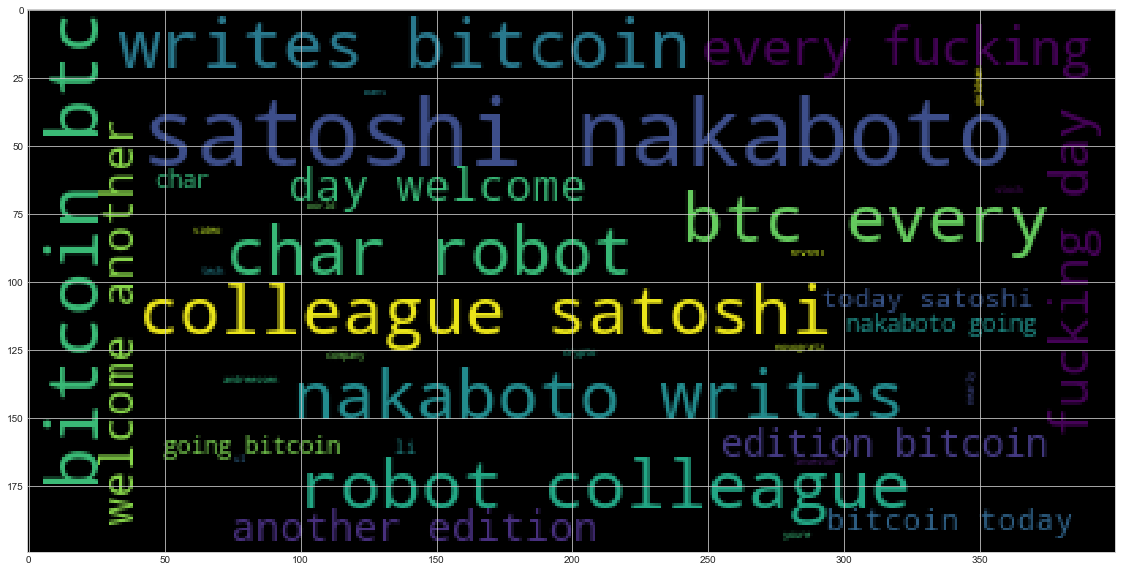

In [34]:

wc = WordCloud().generate(cloud_str(clean_bit_df))
plt.imshow(wc)

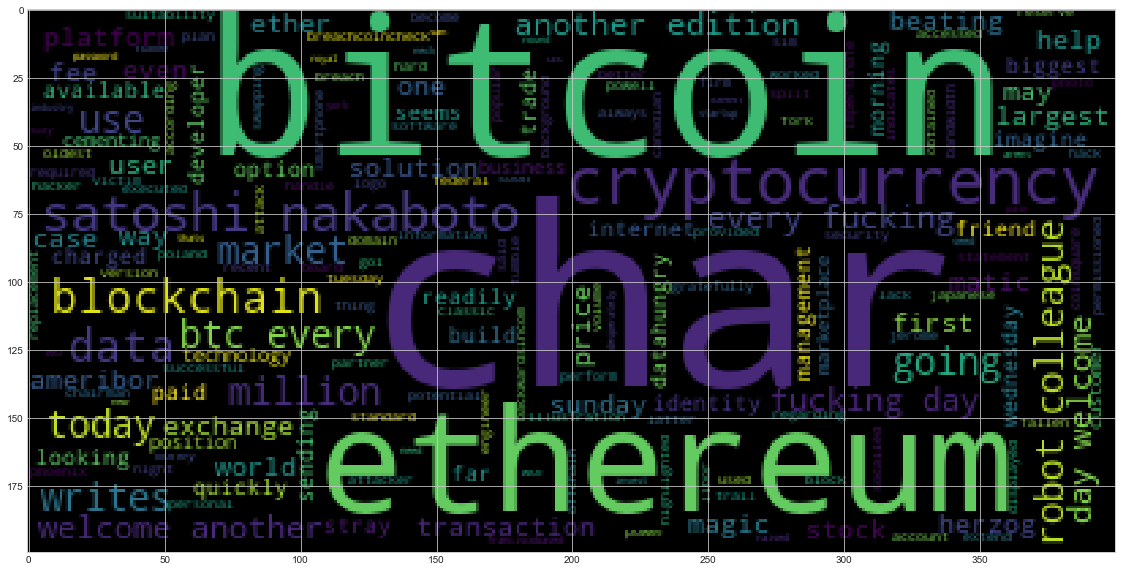

In [35]:
wc = WordCloud().generate(cloud_str(clean_eth_df))
plt.imshow(wc)

In [36]:
# Generate the Ethereum word cloud

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [37]:
import spacy
from spacy import displacy

In [38]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [40]:
# Concatenate all of the bitcoin text together
bit_corpus=' '.join(bit_df['text'].to_list())
print(bit_corpus)

The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars] If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars] Reuters
<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars] <ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "Get on the train."</li><li>Novogratz said that turmoil… [+2757 chars] Bitcoin has always had the potential to become a world standard for money. Even if the blockchain that powers Bitcoin lacks the bandwidth to 

In [41]:
# Run the NER processor on all of the text
bit_doc = nlp(bit_corpus)

# Add a title to the document
bit_doc.user_data["title"] = "Bitcoin NER"

In [42]:
# Render the visualization
displacy.render(bit_doc, style='ent')

In [43]:
for b_ent in bit_doc.ents:
    print(b_ent.text, b_ent.label_)

Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Bitcoin PERSON
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today

---

## Ethereum NER

In [44]:
# Concatenate all of the bitcoin text together
eth_corpus=' '.join(eth_df['text'].to_list())
print(eth_corpus)

Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars] For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.
Magic, a… [+2450 chars] Imagine sending $133 to a friend and being charged a $2.5 million fee. That seems to be the case for a cryptocurrency user who paid a $2.5 million transaction fee during a trade on Wednesday morning … [+2684 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3070 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satoshi 

In [45]:
eth_doc = nlp(eth_corpus)

In [46]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_corpus)

# Add a title to the document
eth_doc.user_data["title"] = "Etherium NER"

In [47]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [48]:
# List all Entities
for e_ent in eth_doc.ents:
    print(e_ent.text, e_ent.label_)

Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
$133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockchain GPE
first ORDINAL
blockchain GPE
Bitcoin GPE
Bitcoin PERSON
Federal Reserve Board ORG
Jerome H. Powell PERSON
May 28, 2020 DATE
one CARDINAL
Japanese NORP
Tuesday DATE
Phoenix GPE
Sunday night TIME
10,500,839 CARDINAL
May 31 DATE
Canadian NORP
SIM ORG
2016 DATE
San Francisco GPE
Magic ORG
$4 million MONEY
New York GPE
Jonathan Herzog PERSON
YouTube PRODUCT
Vitalik Buterin PERSON
Monday DATE
Glen Weyl PERSON
Democrat NORP
Bitcoin NORP
second ORDINAL
22% PERCENT
ag ORG
Sunday DATE
India GPE
Matic Foundation ORG
10 CARDINAL
first ORDINAL
Bitcoin GPE
the year DATE
two CARDINAL
bitcoin GPE
